In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

krzywa = pd.read_csv('krzywa.txt', sep = r'\s+', header = 0,
names = ['Time (s)', 'Z (um)', 'Deflection (V)', 'nan1', 'nan2', 'nan3'],
usecols = ['Time (s)', 'Z (um)', 'Deflection (V)'])

krzywa_kalibracji = pd.read_csv('kalibracja.txt', sep = r'\s+', header = 0,
names = ['Time (s)', 'Z (um)', 'Deflection (V)', 'nan1', 'nan2', 'nan3'],
usecols = ['Time (s)', 'Z (um)', 'Deflection (V)'])


# krzywa_kalibracji = pd.read_csv('Krzywa_kalibracji.csv', sep =';')
deflection = np.array(krzywa_kalibracji['Deflection (V)'])
Z = np.array(krzywa_kalibracji['Z (um)'])

In [24]:
start_k = 700 #Początek naszego wektora wartości kalibracji
stop_k = 850 #Koniec wektora kalibracji

zreg = np.array(Z[start_k:stop_k]) - Z[stop_k]
defreg = np.flip(deflection[start_k:stop_k] - deflection[start_k])

In [25]:
#Linear regression
defreg = defreg.reshape((-1, 1))

model = LinearRegression()
model.fit(defreg, zreg)
model = LinearRegression().fit(defreg, zreg)
r_sq = model.score(defreg, zreg)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

df_pred = model.predict(defreg)
df_pred = np.array(df_pred)

k = 0.02
f = model.coef_ * k * deflection #wynik w uN

print(1/model.coef_)

coefficient of determination: 0.9993037141475768
intercept: 0.004289889215329787
slope: [0.10795004]
[9.26354457]


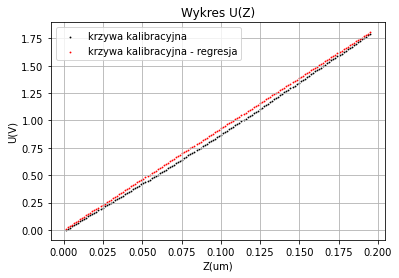

In [26]:


plt.figure(1)
plt.scatter(Z[start_k:stop_k] - Z[stop_k], np.flip(deflection[start_k:stop_k] - deflection[start_k]), s = 0.7, color ='k', label ='krzywa kalibracyjna')
plt.scatter(Z[start_k:stop_k] - Z[stop_k], (zreg / (model.coef_)), s = 0.7, color ='r', label ='krzywa kalibracyjna - regresja')
plt.legend()
plt.title('Wykres U(Z)')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)


In [27]:
deflection_krzywa = np.array(krzywa['Deflection (V)'])
Z_krzywa = np.array(krzywa['Z (um)'])

# 660 - 780 (potęga = 1.504)
# 643 - 780 (potęga = 2.011)
start = 643 #Przesunięcia krzywej swobodnie
stop = 780 #odcięcie do kawałka nas interesującego

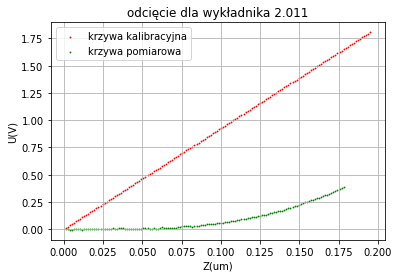

In [28]:
plt.figure(2)
# plt.scatter(Z[start_k:stop_k] - Z[stop_k], np.flip(deflection[start_k:stop_k] - deflection[start_k]), s = 0.7, color ='k', label ='krzywa kalibracyjna')
plt.scatter(Z[start_k:stop_k] - Z[stop_k], (zreg / (model.coef_)), s = 0.7, color ='r', label ='krzywa kalibracyjna')
plt.scatter(Z_krzywa[start:stop] - Z_krzywa[stop], np.flip(deflection_krzywa[start:stop]) - deflection_krzywa[start], s = 0.7, color ='g', label ='krzywa pomiarowa')
plt.legend()
plt.title(f'odcięcie dla wykładnika 2.011')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)

In [29]:
z_krzywej = Z_krzywa[start:stop] - Z_krzywa[stop]
Z_kalibracja_nowa = np.flip(deflection_krzywa[start:stop] - deflection_krzywa[start]) * model.coef_

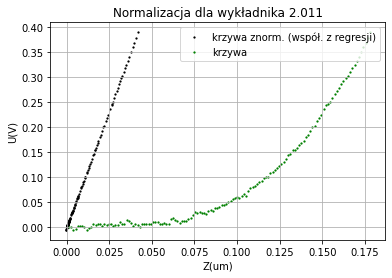

In [30]:
plt.scatter(Z_kalibracja_nowa, np.flip(deflection_krzywa[start:stop] - deflection_krzywa[start]), s = 1.5, color ='k', label ='krzywa znorm. (współ. z regresji)')
plt.scatter(Z_krzywa[start:stop] - Z_krzywa[stop], np.flip(deflection_krzywa[start:stop]) - deflection_krzywa[start], s = 1.5, color ='g', label ='krzywa')
plt.legend()
plt.title('Normalizacja dla wykładnika 2.011')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)

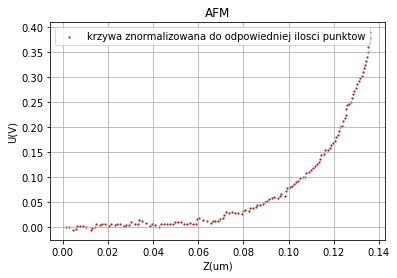

In [31]:
delta_z = abs(z_krzywej - Z_kalibracja_nowa)

plt.figure(3)
plt.scatter(delta_z, np.flip(deflection_krzywa[start:len(delta_z) + start] - deflection_krzywa[start]), s = 1.5, color ='brown', label ='krzywa znormalizowana do odpowiedniej ilosci punktow')
plt.legend()
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)

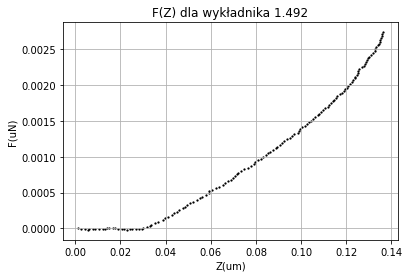

In [32]:
przesuniecie = len(delta_z)-1
force = np.flip(f[start:len(delta_z) + start]) - f[start]
plt.figure(4)
plt.scatter(np.flip(delta_z), np.flip(force), s = 1.5, color = 'black', label = 'krzywa znormalizowana do odpowiedniej ilosci punktow ')
plt.title('F(Z) dla wykładnika 1.492')
plt.xlabel('Z(um)')
plt.ylabel('F(uN)')
plt.grid(True)

In [33]:
def fit(x, a, b):
    return a*x**b

A, M_cov = curve_fit(fit, np.flip(delta_z), np.flip(force))
print(f"Współczynnik kierunkowy [{round(A[1], 3)}]", A[0])
print(f'SD współczynnika kierunkowego {np.sqrt(np.diag(M_cov))[0]}')
print(f'SD potęgi: {np.sqrt(np.diag(M_cov))[1]}\n')

def fit_2(x,a):
    return a*x**2

A_2, M_cov_2 = curve_fit(fit_2, np.flip(delta_z), np.flip(force))
print(f'Współczynnik kierunkowy dla ustalonego wykladnika 2 {A_2[0]}')
print("SD współczynnik kierunkowego dla ustalonego wykladnika 2", np.sqrt(np.diag(M_cov_2))[0], '\n')


def fit_15(x, a):
    return a*x**1.5

A_15, M_cov_15 = curve_fit(fit_15, np.flip(delta_z), np.flip(force))
print("Współczynnik kierunkowy dla ustalonego wykladnika 1.5", A_15[0])
print("SD współczynnik kierunkowego dla ustalonego wykladnika 1.5", np.sqrt(np.diag(M_cov_15))[0], '\n')

v = 0.5
alfa = 5*np.pi/36
R = 50*10**-3 # w mikrometrach

Współczynnik kierunkowy [2.062] 0.15984659019046998
SD współczynnika kierunkowego 0.006197033416132745
SD potęgi: 0.018096846399497584

Współczynnik kierunkowy dla ustalonego wykladnika 2 0.14001528086197007
SD współczynnik kierunkowego dla ustalonego wykladnika 2 0.000438386686164099 

Współczynnik kierunkowy dla ustalonego wykladnika 1.5 0.04736739220523444
SD współczynnik kierunkowego dla ustalonego wykladnika 1.5 0.00045958588143461707 



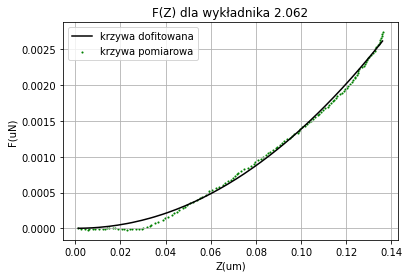

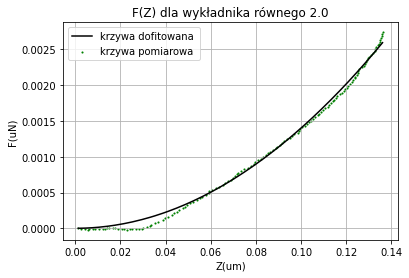

In [34]:
plt.figure(5)
plt.scatter(np.flip(delta_z), np.flip(force), s = 1.2, color = 'g', label = 'krzywa pomiarowa')
plt.plot(np.flip(delta_z), (np.flip(delta_z)**A[1])*A[0], color = 'k', label = 'krzywa dofitowana')
plt.legend()
plt.title(f'F(Z) dla wykładnika {round(A[1], 3)}')
plt.xlabel('Z(um)')
plt.ylabel('F(uN)')
plt.grid(True)
plt.show()

plt.figure(5)
plt.scatter(np.flip(delta_z), np.flip(force), s = 1.2, color = 'g', label = 'krzywa pomiarowa ')
plt.plot(np.flip(delta_z), (np.flip(delta_z)**2)*A_2[0], color = 'k', label = 'krzywa dofitowana')
plt.legend()
plt.title('F(Z) dla wykładnika równego 2.0')
plt.xlabel('Z(um)')
plt.ylabel('F(uN)')
plt.grid(True)
plt.show()

In [35]:
#Dokładnie wyliczone wartości już do empirycznego nakładania fitów(tutaj bierzemy odpowiednio od potęgi nas interesującej)
E1 = (A[0]*3*(1-v**2))/(4*np.sqrt(R))
var_E1 = (np.sqrt(np.diag(M_cov))[0]*3*(1-v**2))/(4*np.sqrt(R))

E2 = A[0]*np.pi*(1-v**2)/(2*np.tan(alfa))
var_E2 = np.sqrt(np.diag(M_cov))[1]*np.pi*(1-v**2)/(2*np.tan(alfa))

print(f'Moduł Younga dla piramidalnego: {round(E2*1000, 2)} ± {round(var_E2*1000, 2)} [kPa]')
# print('Odchylenie standardowe dla piramidalnego:', var_E2, '[MPa]')

print(f'Moduł Younga dla sferycznego: {round(E1*1000, 2)} ± {round(var_E1*1000, 2)} [kPa]')
# print('Odchylenie standardowe dla sferycznego:', var_E1, '[MPa]')

Moduł Younga dla piramidalnego: 403.84 ± 45.72 [kPa]
Moduł Younga dla sferycznego: 402.11 ± 15.59 [kPa]


In [36]:
#Wyznaczone wartości przy ustalonym wykładniku w tym wypadku 2 

Ep = (A_2[0]*3*(1-v**2))/(4*np.sqrt(R))
var_Ep = (np.sqrt(np.diag(M_cov_2))[0]*3*(1-v**2))/(4*np.sqrt(R))

print(f'Moduł Younga dla piramidalnego: {round(Ep*1000, 2)} ± {round( Ep * (np.sqrt(np.diag(M_cov))[0]/A[0])*1000, 2)} [kPa]')
# print('Odchylenie standardowe dla piramidalnego:', var_Ep, '[MPa]')
# print(u(A)*(E/A))


Moduł Younga dla piramidalnego: 352.22 ± 13.66 [kPa]


In [37]:
# ___________________________________________________
#Wyznaczone wartości przy ustalonym wykładniku w tym wypadku 1.5

Es = (A_15[0]*3*(1-v**2))/(4*np.sqrt(R))
var_Es = np.sqrt(np.diag(M_cov_15))[0]*np.pi*(1-v**2)/(2*np.tan(alfa))

print(f'Moduł Younga dla sferycznego: {round(Es*1000, 2)} ± {round( Es * (np.sqrt(np.diag(M_cov))[0]/A[0])*1000, 2)} [kPa]')
# print('Odchylenie standardowe dla sferycznego:', var_Es, '[MPa]')

Moduł Younga dla sferycznego: 119.16 ± 4.62 [kPa]
